In [2]:
import pandas as pd
df = pd.read_csv('chapter_2/creditcard_sampledata_2.csv')

In [3]:
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,221547,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,184524,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,91201,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,26115,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,201292,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [4]:
X = df.drop(['Class', 'Unnamed: 0'], axis=1)
y = df.iloc[:, -1]

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
y.value_counts()

0    7000
1     300
Name: Class, dtype: int64

In [8]:
total_obs = len(y)
non_fraud = [i for i in y if i==0]
count_non_fraud = non_fraud.count(0)
percentage = (float(count_non_fraud)/float(total_obs)) * 100
print(percentage)

95.8904109589041


In [12]:
fraud = [i for i in y if i == 1]
count_fraud = fraud.count(1)
percentage = (float(count_fraud)/float(total_obs)) * 100
print(percentage)

4.10958904109589


In [29]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
predicted = model.predict(X_test)
#Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', metrics.classification_report(y_test, predicted))
conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2100
           1       0.97      0.78      0.86        90

    accuracy                           0.99      2190
   macro avg       0.98      0.89      0.93      2190
weighted avg       0.99      0.99      0.99      2190

Confusion matrix:
 [[2098    2]
 [  20   70]]


In [18]:
average_precision = metrics.average_precision_score

Random Forest: f1=0.864 auc=0.895


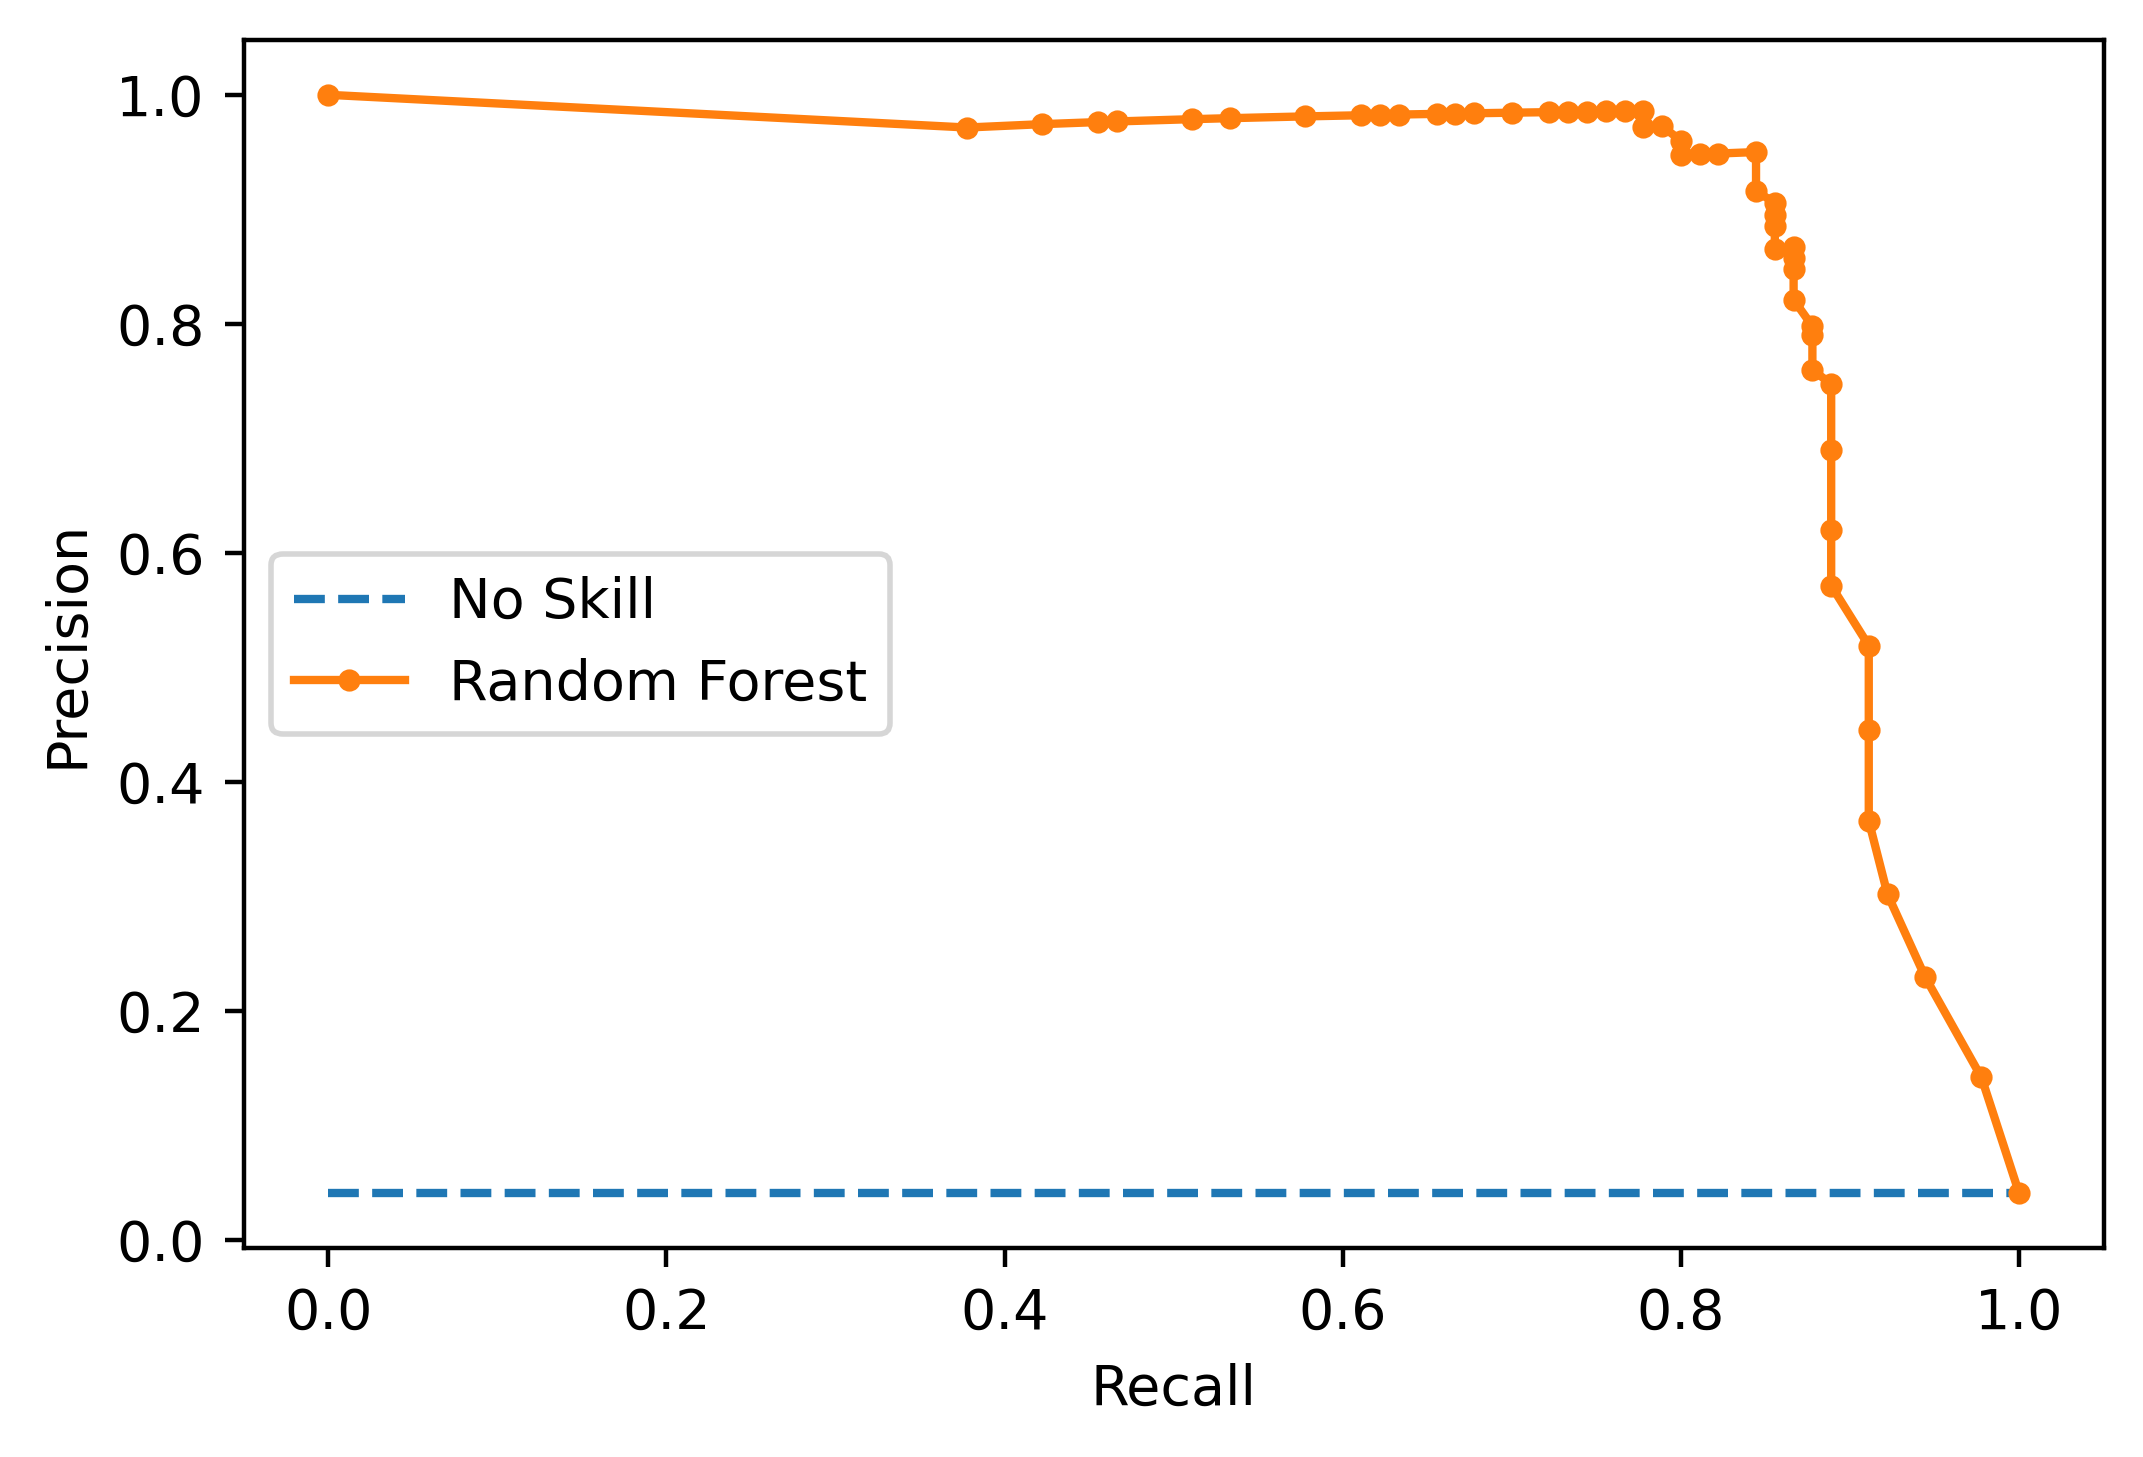

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
y_proba = model.predict_proba(X_test)[:, 1]
predicted = model.predict(X_test)
rf_precision, rf_recall, _ = metrics.precision_recall_curve(y_test, y_proba)
rf_f1, rf_auc = metrics.f1_score(y_test, predicted), metrics.auc(rf_recall, rf_precision)
# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

Text(0.5, 1.0, 'ROC curve')

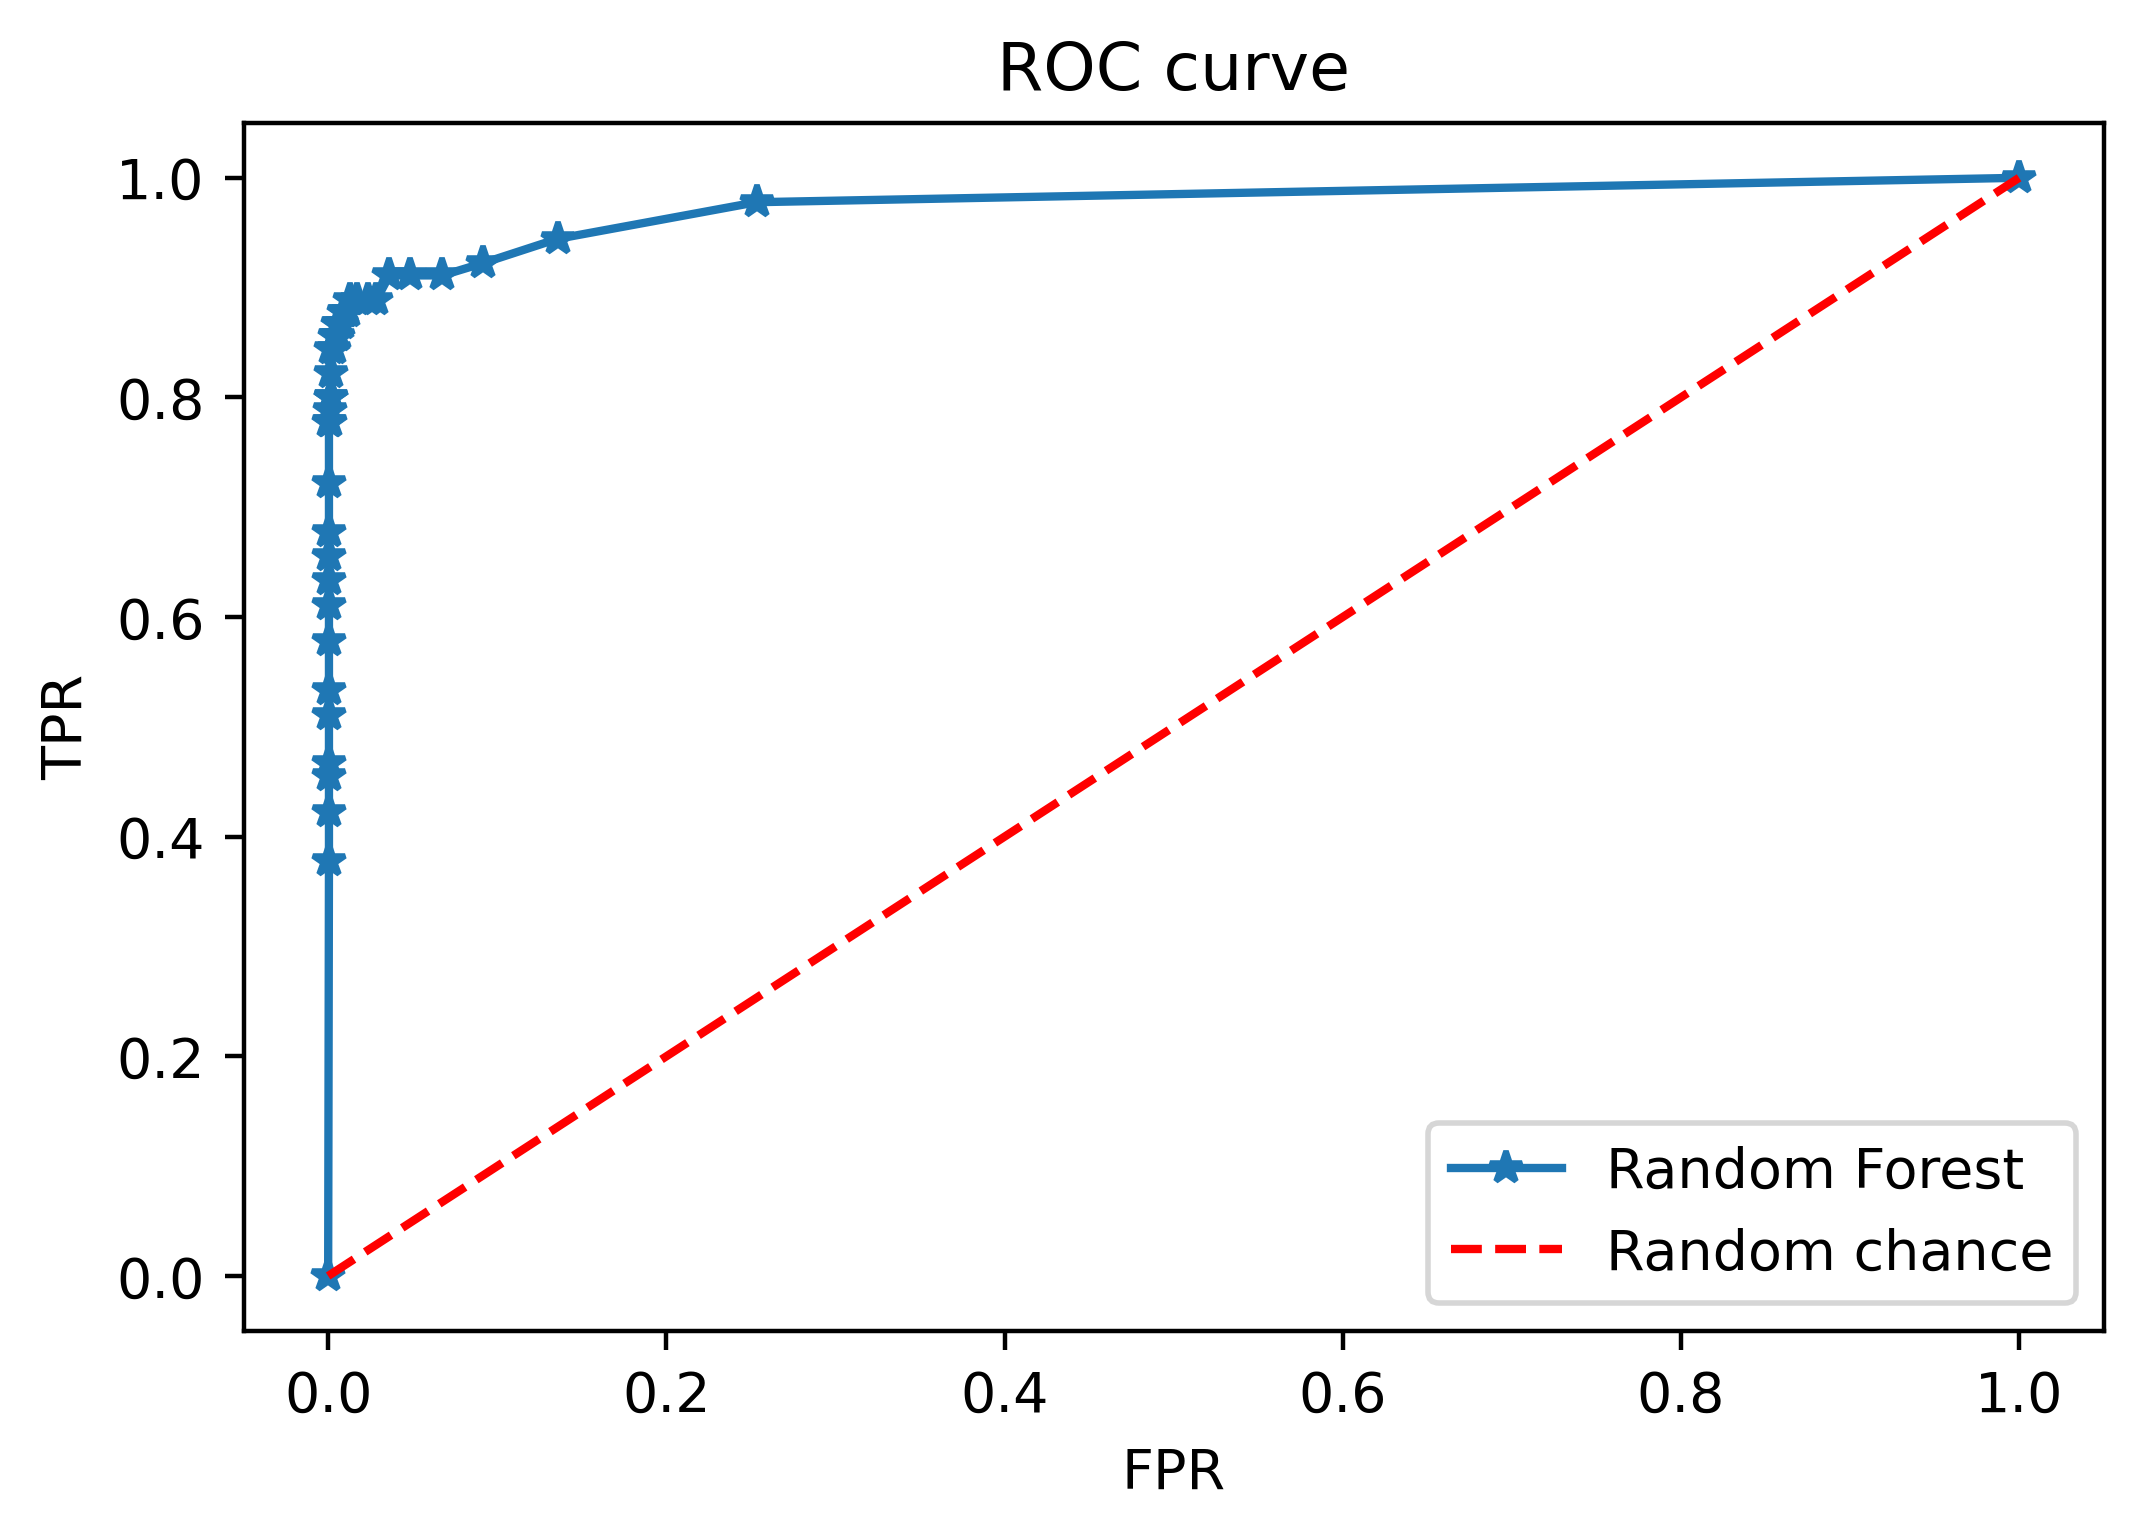

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Random Forest', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [70,80,90],
    'max_features': [2,3,4],
    'min_samples_leaf': [3,4,5],
    'min_samples_split':[6,7,8,9,10],
    'n_estimators':[300,350,400],
    'class_weight': [None, 'balanced', {0:1 , 1:12},
                    {0:1, 1:10}, {0:1, 1:14}],
    'bootstrap' : [True, False]
}
model = RandomForestClassifier()
Grid_model = GridSearchCV(estimator=model, 
                    param_grid=params, cv=5, 
                    n_jobs=-1, scoring='f1')
Grid_model.fit(X_train, y_train)

In [36]:
Grid_model.best_params_

{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 350}

In [37]:
Grid_model.best_estimator_
Grid_model.best_score_

0.9023234964321125

In [ ]:
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)
print(metrics.roc_auc_score(y_test, probs[:,1]))
print(metrics.classification_report(y_test, predicted))

In [ ]:
model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:12}, 
                               criterion='entropy',max_depth=10,min_samples_leaf=10, 
                                n_estimators=20, n_jobs=-1, random_state=5)
model.fit(X_train, y_train)

In [45]:
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)
print(metrics.roc_auc_score(y_test, probs[:,1]))

0.985441798941799
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2100
           1       0.93      0.83      0.88        90

    accuracy                           0.99      2190
   macro avg       0.96      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190



In [ ]:
model = RandomForestClassifier(class_weight={0:1,1:12}, criterion='gini',
            max_depth=8, max_features='log2', min_samples_leaf=10, 
            n_estimators=30, n_jobs=-1, random_state=5)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)
print(metrics.roc_auc_score(y_test, probs[:,1]))

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
model.fit(X_train, y_train)

In [ ]:
predicted = model.predict(X_test)
#Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', metrics.classification_report(y_test, predicted))
conf_mat = metrics.confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

In [ ]:
# Import the package
from sklearn.ensemble import VotingClassifier

# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
                              min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='soft',  
                                  weights=[1, 4, 1], flatten_transform=True)

ensemble_model.fit(X_train, y_train)
predicted = ensemble_model.predict(X_test)
probs = ensemble_model.predict_proba(X_test)
print(metrics.roc_auc_score(y_test, probs[:,1]))
print(metrics.classification_report(y_test, predicted))